#OUTLINE FOR THIS PROJECT - CHURN PREDICTION
1. IMPORTING DATASET
2. DATA CLEANING
3. EXPLORATORY DATA ANALYSIS
4. DATA PREPROCESSING FOR MODEL
5. BASIC MODEL BUILDING
6. BASIC MODEL EVALUATION (MAYBE?)



1.Importing Dataset & Libraries
* Importing the nexessary libraries for data processing

In [90]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import keras
keras.__version__
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


#set for the dataset display for max row and column shown for 500
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

* Importing the data set
This dataset belongs to the bank that is hidden its name because of data security. The dataset consists of 13 attributes and 10,000 rows. The following shows description of attributes.

Customer ID: This attribute is unique and assume that primary key

Surname: it belongs to surname of customer and string values

Geography: it shows country of customer

Gender: male/female

Credit Score: it gives credit score of customers. That score calculates interbank system. High score shows that the customer debt high repayment capacity.

Age: age of customers

Tenure: The number of ages the customer is in the bank.

Balance: Customer's money in the bank.

Number of Products: Number of products owned by the customer.

Credit Card: Whether the customer has a credit card

Active Status: Customer's presence in the bank

Estimated Salary: Customer's estimated salary

Exited: Churn or not

In [2]:
#load dataset
data = pd.read_csv('Churn Modeling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


From above we see that our data set are 10 K row with 14 columns

2. Data Cleaning

In [3]:
#Start to get more information
data.info()

# check the missing value on each coloumn  
data.isna().sum()

#check any duplicates data or not
data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


0

from above  we can see that has 3 object and the rest are continous variables, no missing data  and no duplicated data so we can good to go start

In [4]:
# Display the data types of our dataset columns
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

3. Exploratory Data Analysis 

In [5]:
# to better understand the numeric data, we want to use the .describe() method. This gives us an understanding of the central tendencies of the data 
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Credit score is between 350 (min) and 850 (max). The average age of the customers is 39 (round up the 38.92). Tenure is maximum ten years which assume age of the bank. Minimum value and first quantiles of Balance are equal 0 which means the distribution may not be normal.

In [6]:
#drop the customer ID, Surname, Rownumber because it not nessesary 
data.drop(['CustomerId', 'Surname', 'RowNumber'],axis='columns',inplace=True)

#check the new dataset
data.copy()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


The dataset seems good to explore 

In [7]:
#check the customer that leave the bank
data['Exited'].value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

From above the customer that leave the bank around 25.5808113% from (2037/7963 customer)

In [8]:
#quick way to separate numeric columns
data.describe().columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype='object')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

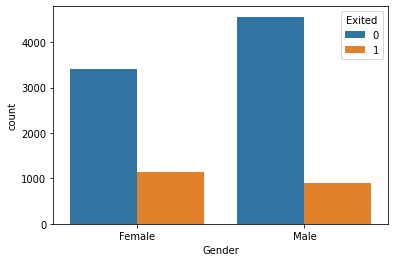

In [9]:
#find the Exited based on Gender
sns.countplot('Gender', hue='Exited', data=data)



From above we can see that most of male customer retain as customer and female customer have tendency to leave/churn

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Geography', ylabel='count'>

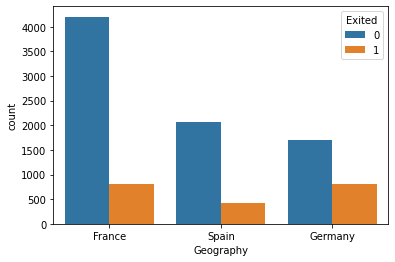

In [10]:
#find the Exited based on Geography
sns.countplot('Geography', hue='Exited', data=data)



The most of customer for this bank has from france with germany for the less one

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

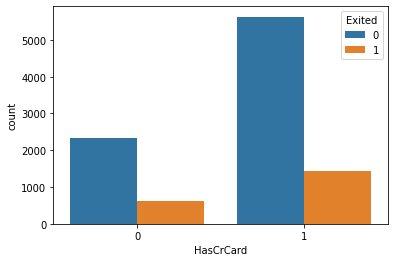

In [11]:
#find the Exited based on has credit card
sns.countplot('HasCrCard', hue='Exited', data=data)

people that has credit card tendency to stay on bank because it easy for them to link their credit card with their debit card

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

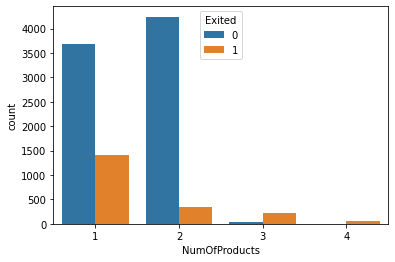

In [12]:
#find the Exited based on has number that product of bank
sns.countplot('NumOfProducts', hue='Exited', data=data)


from here we can see that most loyal customer that has 1 or 2 product of the bank, and for more than 2 have tendency to leave.

4. Data Preprocessing Model

    *One-hot-encoding the categorical variable "Geography" and Label-Encoding the categorical variable "Gender"

In [13]:
#Change the geography and Gender by using one hot encoding
#lets find the categorialfeatures
list_1=list(data.columns)
#Create the loop
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)
#One hot encoding 
le=LabelEncoder()
# Using the dictionary to label future data
for i in list_cate:
    data[i]=le.fit_transform(data[i])
#print the data
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


Split the data set and Scalling the data

5. Basic Model Building

for this i might use the Models (Supervised Machine Learning):

    a. Bayesian Networks
    b. Logistic Regression 
    c. Decision Trees
    d. Support Vector Machines
    e. Artificial Neural Networks

In [25]:
#define the X and Y axis
X = data.iloc[:, :9].values
Y = data.iloc[:, 10].values


#split the data for training and test dataset
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3,random_state = 0)

#Scale data
sc = StandardScaler()
#scalling training set
X_train = sc.fit_transform(X_train)
#scalling test set
X_test = sc.fit_transform(X_test)


In [17]:
# Gaussian model
gaussian_model = GaussianNB() 
# Training the model
gaussian_model.fit(X_train, y_train) 
# Predict the response
prediction = gaussian_model.predict(X_test) 

result = {'Exited':y_test, 'pred':prediction}
result_df = pd.DataFrame(result)
# Checking NB accuracy
print("Accuracy:", metrics.accuracy_score(y_test, prediction)) 

Accuracy: 0.821


In [27]:
# Logistic Regression model
logisticRegression_model = LogisticRegression(random_state=0) 
# Training the model
logisticRegression_model.fit(X_train, y_train) 
# Predict the response
prediction_1 = logisticRegression_model.predict(X_test)
# Create a confusion matrix
confusion_matrix = confusion_matrix(y_test, prediction_1) 
# Checking LR accuracy
print("Accuracy:", (confusion_matrix[0][0] + confusion_matrix[1][1]) / 22) 
# Score report
print(classification_report(y_test,prediction_1))

Accuracy: 109.5
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2379
           1       0.59      0.16      0.25       621

    accuracy                           0.80      3000
   macro avg       0.70      0.56      0.57      3000
weighted avg       0.77      0.80      0.75      3000



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


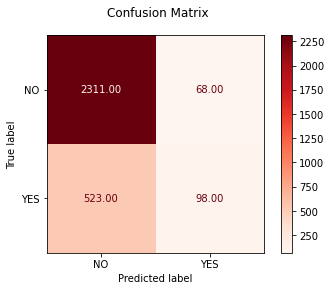

In [19]:
# Plot
plot_1 = plot_confusion_matrix(logisticRegression_model, X_test, y_test, display_labels=["NO","YES"],cmap = plt.cm.Reds,values_format = '.2f')
plot_1.figure_.suptitle("Confusion Matrix")
plt.show()

 crosscheck by use confusion matrix or we try to understand the accuracy and precision just from confusion matrix

In [35]:
#Accuracy
round((2311 + 98)/(2311 + 68 + 523 + 98),2)

0.8

In [36]:
# precision for customer didn't churn
round((2311)/(2311 + 523),2)

0.82

In [37]:
#precision for customer did churn
round((98)/(98+68),2)

0.59

From our logistic regression and confusion matrix we can see that for accuracy are 0.80 with precision for customer who didnt churn 0.82 and customer that did churn 0.59.

In [31]:
# 2 MLM Decision Tree Classifier
#create default decision tree classifier object
DecisionTree_model_Gini = DecisionTreeClassifier()
#use entropy criterion
DecisionTree_model_entropy = DecisionTreeClassifier(criterion = 'entropy')
#use max depth of 3
DecisionTree_model_depth10 = DecisionTreeClassifier(max_depth = 10)
#fit the trees
DecisionTree_model_Gini.fit(X_train, y_train)
DecisionTree_model_entropy.fit(X_train, y_train)
DecisionTree_model_depth10.fit(X_train, y_train)

#make prediction
y_pred_gini    = DecisionTree_model_Gini.predict(X_test)
y_pred_entropy = DecisionTree_model_entropy.predict(X_test)
y_pred_depth10  = DecisionTree_model_depth10.predict(X_test)

#print the results
print('Accuracy(gini):', metrics.accuracy_score(y_test, y_pred_gini))
print('Accuracy(entropy):', metrics.accuracy_score(y_test, y_pred_entropy))
print('Accuracy(depth10):', metrics.accuracy_score(y_test, y_pred_depth10))

# Score report
print(classification_report(y_test,prediction_2))

Accuracy(gini): 0.7886666666666666
Accuracy(entropy): 0.7986666666666666
Accuracy(depth10): 0.8403333333333334


In [38]:
clf = DecisionTreeClassifier(max_depth = 10, random_state = 40)
clf.fit(X_train,y_train)
prediction_2 = clf.predict(X_test)

# Score report
print(classification_report(y_test,prediction_2))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2379
           1       0.65      0.51      0.57       621

    accuracy                           0.84      3000
   macro avg       0.76      0.72      0.74      3000
weighted avg       0.83      0.84      0.83      3000



we can see that from both formula that give same result for accuracy 0.84 

In [67]:
#Support Vector Machines (SVMs)
#create 3 SVM Classifiers
#Linear Kernel
Linear_SVM = svm.SVC(kernel= 'linear')
#Sigmoid Kernel
sigmoid_SVM = svm.SVC(kernel= 'sigmoid')
#RBF kernel
rbf_SVM = svm.SVC(kernel= 'rbf')

#train the model using the training sets
Linear_SVM.fit(X_train, y_train)
sigmoid_SVM.fit(X_train, y_train)
rbf_SVM.fit(X_train, y_train)

#predict the response for test dataset
y_pred_linear = Linear_SVM.predict(X_test)
y_pred_sigmoid = sigmoid_SVM.predict(X_test)
y_pred_rbf = rbf_SVM.predict(X_test)

#calculate the accuracy of our model
print('Accuracy (linear):', metrics.accuracy_score(y_test, y_pred_linear))
print('Accuracy (sigmoid):', metrics.accuracy_score(y_test, y_pred_sigmoid))
print('Accuracy (rbf):', metrics.accuracy_score(y_test, y_pred_rbf))

Accuracy (linear): 0.793
Accuracy (sigmoid): 0.6893333333333334
Accuracy (rbf): 0.859


so from above we can see that the best kernel that give accuracy are Gausian Kernel. for linear we might should change into polynomial kernel and the sigmoid are the worst performances.

5. Basic Model Building

for this i might use the Models (Unsupervised Machine Learning):

a. Random Forest

b.Gradient Boosting Machines

c. XGBoost

d. ANN (Artificial Neural Network)

In [68]:
# Random Forest:
rf_model = RandomForestClassifier(random_state=20).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.8633333333333333

In [70]:
# Gradient Boosting Machines
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=20).fit(X_train, y_train)
y_pred3 = gbm_model.predict(X_test)
accuracy_score(y_pred3, y_test)

0.8636666666666667

In [71]:
# XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=20, eval_metric='mlogloss').fit(X_train, y_train)
y_pred4 = xgb_model.predict(X_test)
accuracy_score(y_pred4, y_test)

0.8556666666666667

From gradier boosting machines we get 86,36% which this this the higher than random forest (86,33%) and XGBoost (85,56%) for the accuracy.

In [77]:
# Artificial Neural Network
mlpc_model = MLPClassifier(random_state=20).fit(X_train, y_train)
y_pred5 = mlpc_model.predict(X_test)
accuracy_score(y_pred5, y_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.859

In [81]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train,y_train,batch_size = 10,
    epochs=200,
)

Epoch 1/200
700/700 [==============================] - 5s 5ms/step - loss: 0.5025 - accuracy: 0.7970
Epoch 2/200
700/700 [==============================] - 3s 4ms/step - loss: 0.4349 - accuracy: 0.7977
Epoch 3/200
700/700 [==============================] - 4s 6ms/step - loss: 0.4325 - accuracy: 0.7977
Epoch 4/200
700/700 [==============================] - 4s 5ms/step - loss: 0.4301 - accuracy: 0.7977
Epoch 5/200
700/700 [==============================] - 4s 6ms/step - loss: 0.4273 - accuracy: 0.7977
Epoch 6/200
700/700 [==============================] - 4s 5ms/step - loss: 0.4247 - accuracy: 0.8106
Epoch 7/200
700/700 [==============================] - 4s 5ms/step - loss: 0.4219 - accuracy: 0.8234
Epoch 8/200
700/700 [==============================] - 4s 5ms/step - loss: 0.4198 - accuracy: 0.8286
Epoch 9/200
700/700 [==============================] - 3s 5ms/step - loss: 0.4182 - accuracy: 0.8291
Epoch 10/200
700/700 [==============================] - 3s 5ms/step - loss: 0.4170 - accura

In [94]:
y_pred6 = classifier.predict(X_test)
y_pred6 = (y_pred6>0.5)
#print y_pred
y_pred6

94/94 [==============================] - 0s 4ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

Using Confusion matrix to see the number of correct and incorrect predictions

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred6)
cm

array([[2309,   70],
       [ 416,  205]])

Using accuracy_score to analyse the accuracy on the test set.

In [96]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8636666666666667

from above we can see that the accuracy that we get from simple ANN are 85.90% and if we add more layer the accuracy drop into 83,36%.